
<h1><center>Early Detection of Heart Disease Using Big Data Approach</center></h1>
<hr>

The Dataset used in this project is available on the UCI machine learning Repository.

It can be found at: https://archive.ics.uci.edu/ml/datasets/heart+disease.
It consists of 303 different examples spread over 14 classes. Of the 303 examples, 165 are of "normal" people. We have  13 features, which include age, sex, Thal, CP of patients and other related information.

Our first goal is to predict if a person is suffering from arrhythmia or not.

-----

## Data Reading

### Importing Essential Libraries

In [1]:
# Basic
import os
import sys
import json
import pymongo 
import warnings
import numpy as np
import pandas as pd
from itertools import chain
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading the Data

In [2]:
def import_content(filepath):
    mng_client = pymongo.MongoClient("mongodb+srv://<username>:<password>@heart.9ynzc.mongodb.net/Heartpatientdatabase?retryWrites=true&w=majority")
    mng_db = mng_client['Heartpatientdatabase'] 
    collection_name = 'Heart_Data_new'
    db_cm = mng_db[collection_name]
    cdir = os.path.abspath('./')
    file_res = os.path.join(cdir, filepath)
    data = pd.read_csv(file_res)
    data_json = json.loads(data.to_json(orient='records'))
    db_cm.remove()
    db_cm.insert(data_json)

In [3]:
#import_content('heart.csv')

In [4]:
myclient = pymongo.MongoClient("mongodb+srv://<username>:<password>@heart.9ynzc.mongodb.net/Heartpatientdatabase?retryWrites=true&w=majority")
mydb = myclient["Heartpatientdatabase"] 
mycol = mydb["Heart_Data_new1"]

In [5]:
#df=pd.read_csv("https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Heart%20Disease%20Prediction/heart.csv")


df=pd.DataFrame(list(mycol.find({},{'_id': False})))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis
-----
Using pandas procfiling report to analyze the dataset with explorative mode so that we can get indepth knowledge of the data.

In [6]:
# Data Visualization libraries
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [32]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [33]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
profile.to_file("EDA_heart_Disease.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

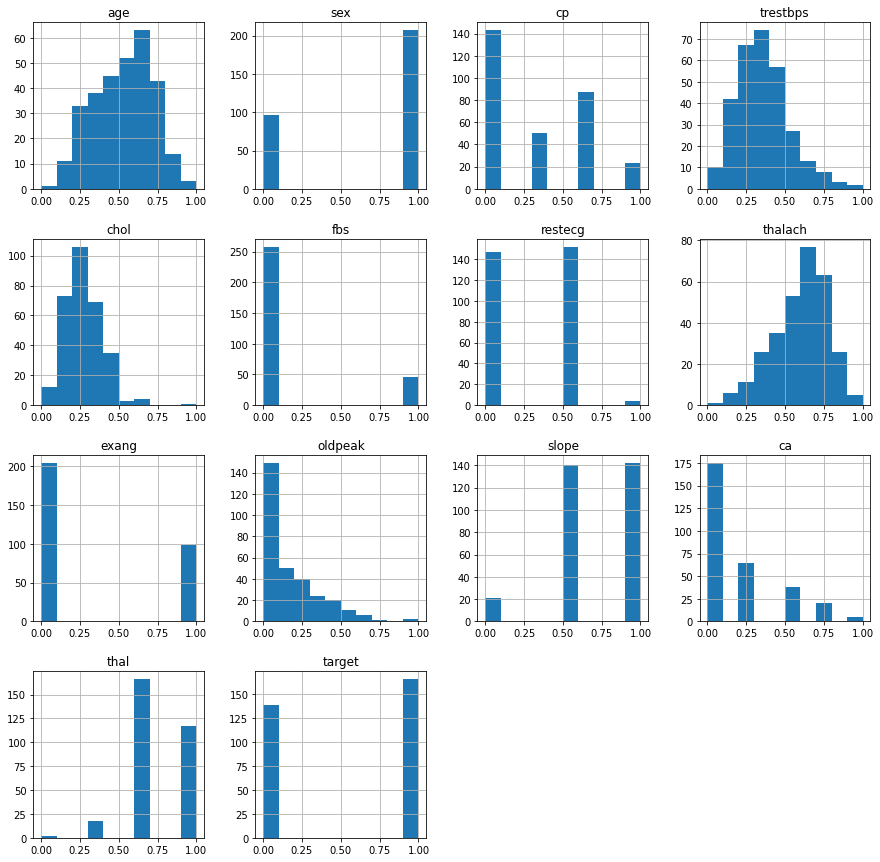

In [35]:
## Histgraph

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (303, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
 

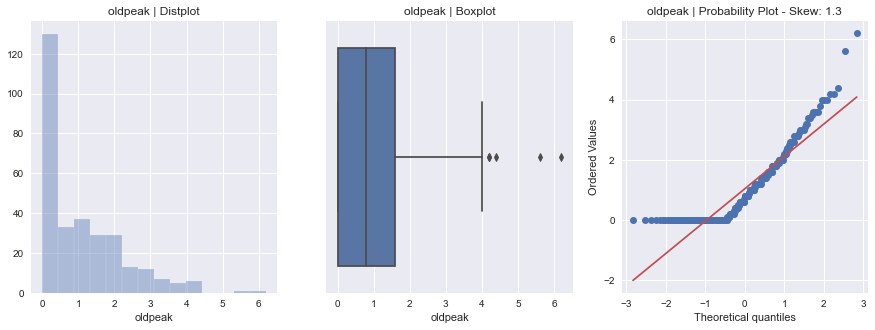

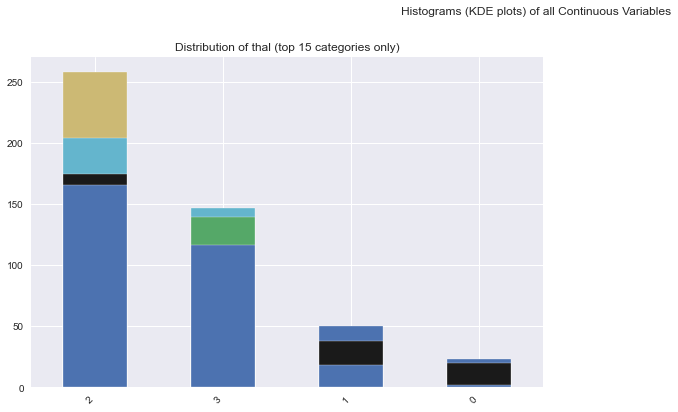

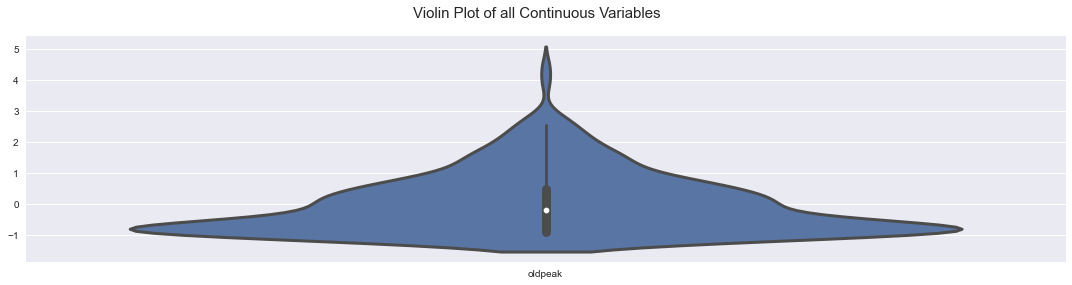

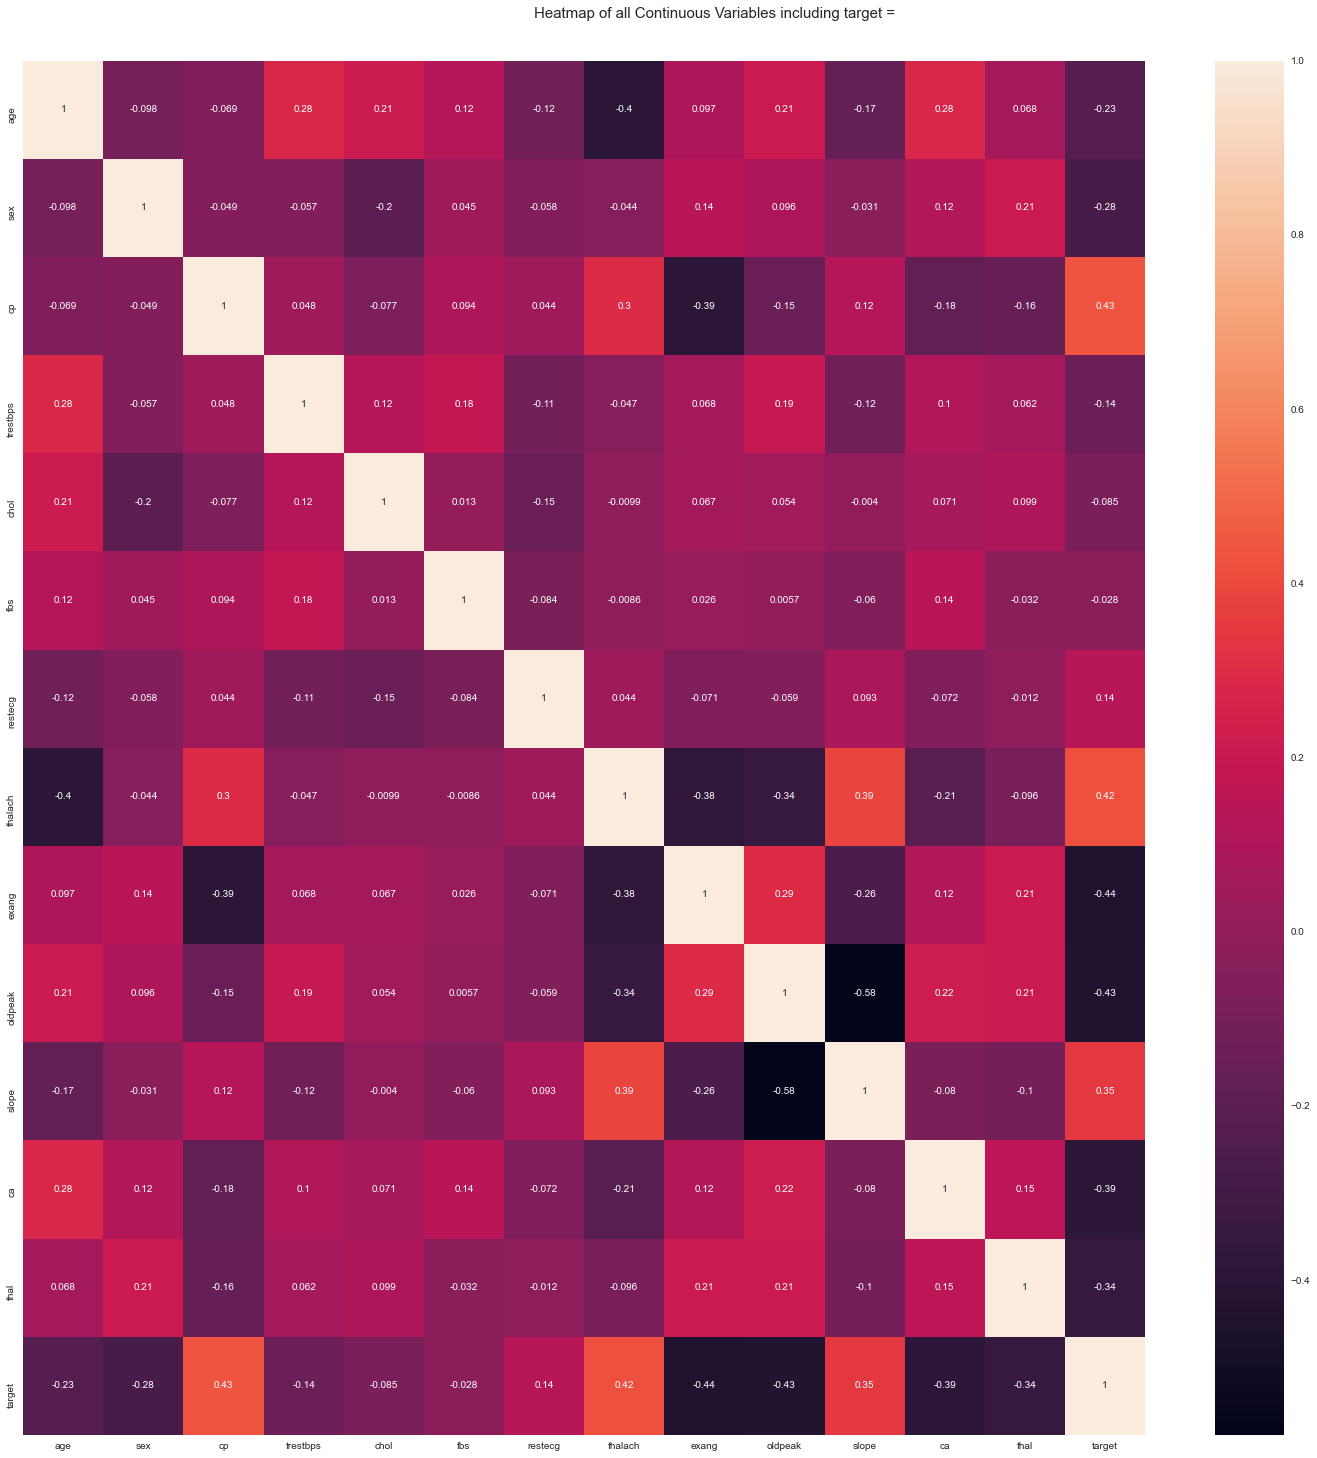

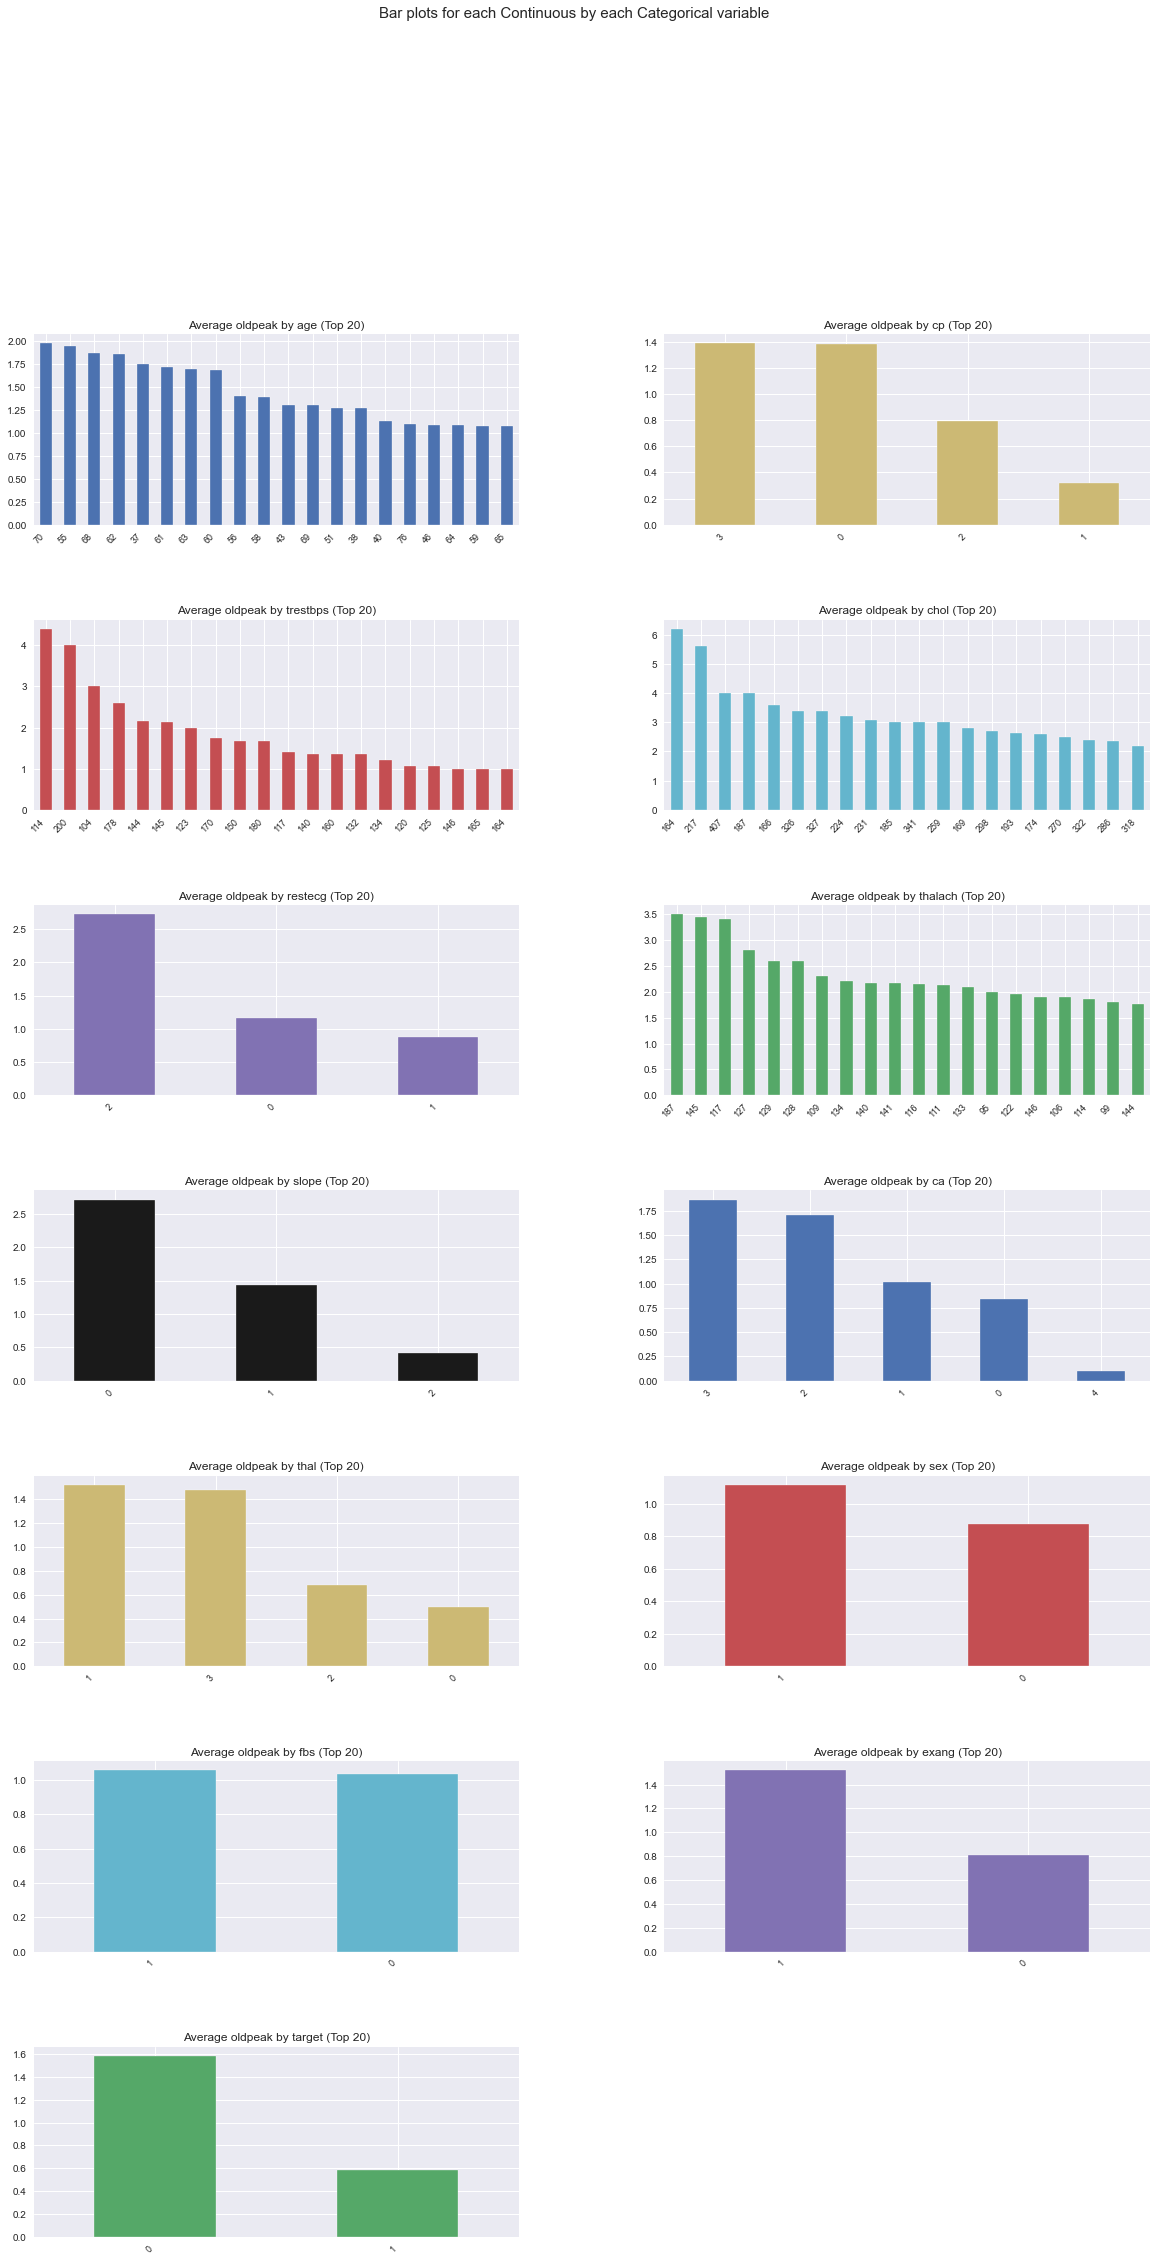

Time to run AutoViz (in seconds) = 88.536

 ###################### VISUALIZATION Completed ########################


In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
visualization = AV.AutoViz("https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Heart%20Disease%20Prediction/heart.csv")

## Feature Scaling and Splitting dataset

**Splitting the dataset into 8:2 ratio. we will be using 80% of the data for traing out model and 20% of data for testing our model.**


### Handling categorical features


In [12]:
# Data Processing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
#Model Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [14]:
scal=MinMaxScaler()
feat=['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach' ,'exang', 'oldpeak' ,'slope', 'ca', 'thal']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [15]:
X=df.drop("target",axis=1).values
Y=df.target.values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)


## Evaluation strategy

As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precisions (we can't accept a result having the probability of saying to a healthy person that you have heart disease(FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).


In [16]:
# Evaluation matrices
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

In [17]:
x_test=X_test
y_test=Y_test
def evaluation(model,model_name):
    y_pred=model.predict(x_test)
    conf_matrix =confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    rcl = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    class_report = classification_report(y_test,y_pred)
    tempre =[ model_name,accuracy,rcl,f1]
    metric_dict={'accuracy Score': round(accuracy,3),
               'recall Score': round(rcl,3),
               'F1 score': round(f1,3),
              }
    return (print("<--------------Evaluation Report of "+ model_name +" Model ------------------->\n"),
            print("Confusion matrix of "+model_name+" Model is :\n"),
            print(conf_matrix),
            print("\n"),
            print("Accuracy of the "+model_name+" Model is : ",accuracy),
            print("\n"),
            print("Classification Report of "+model_name+" Model is :\n"),
            print(class_report),
            print(metric_dict),
            tempre
           )


# Modeling



In [18]:
# Model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

In [19]:
cv_n_split = 3
random_state = 40
test_train_split_part = 0.2
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [20]:
result = pd.DataFrame(columns=['Model','Accuracy Score','Recall Score','F1 Score'])


## Logestic Regression

In [21]:
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
m = evaluation(lr,"Logestic Regression")
res=list(chain.from_iterable(list(filter(None, m))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Logestic Regression Model ------------------->

Confusion matrix of Logestic Regression Model is :

[[20  7]
 [ 3 31]]


Accuracy of the Logestic Regression Model is :  0.8360655737704918


Classification Report of Logestic Regression Model is :

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

{'accuracy Score': 0.836, 'recall Score': 0.912, 'F1 score': 0.861}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111


## Naive Bayes Classifier

In [22]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
m = evaluation(nb,"Naive bayes")
res=list(chain.from_iterable(list(filter(None, m))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Naive bayes Model ------------------->

Confusion matrix of Naive bayes Model is :

[[21  6]
 [ 3 31]]


Accuracy of the Naive bayes Model is :  0.8524590163934426


Classification Report of Naive bayes Model is :

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

{'accuracy Score': 0.852, 'recall Score': 0.912, 'F1 score': 0.873}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239


## Decision Tree Classifier

In [23]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, Y_train)
p = evaluation(dt,"Decision Tree")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Decision Tree Model ------------------->

Confusion matrix of Decision Tree Model is :

[[23  4]
 [ 7 27]]


Accuracy of the Decision Tree Model is :  0.819672131147541


Classification Report of Decision Tree Model is :

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

{'accuracy Score': 0.82, 'recall Score': 0.794, 'F1 score': 0.831}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769


## Support Vector Machine

In [24]:
SVC_clf=SVC(kernel='rbf', C=4)
SVC_clf.fit(X_train,Y_train)
p = evaluation(SVC_clf,"Support Vector Machine")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Support Vector Machine Model ------------------->

Confusion matrix of Support Vector Machine Model is :

[[23  4]
 [ 2 32]]


Accuracy of the Support Vector Machine Model is :  0.9016393442622951


Classification Report of Support Vector Machine Model is :

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

{'accuracy Score': 0.902, 'recall Score': 0.941, 'F1 score': 0.914}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286


## Random Forest Classifier

In [25]:
RF_clf=RandomForestClassifier(n_estimators=30,max_depth=3,random_state=3)
RF_clf.fit(X_train,Y_train)
p = evaluation(RF_clf,"Random Forest Classifier")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Random Forest Classifier Model ------------------->

Confusion matrix of Random Forest Classifier Model is :

[[22  5]
 [ 2 32]]


Accuracy of the Random Forest Classifier Model is :  0.8852459016393442


Classification Report of Random Forest Classifier Model is :

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

{'accuracy Score': 0.885, 'recall Score': 0.941, 'F1 score': 0.901}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286
4,Random Forest Classifier,0.885246,0.941176,0.901408


## KNN Classifier

In [26]:
Knn_clf=  KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train,Y_train)
p = evaluation(Knn_clf,"K-NN Classifier")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of K-NN Classifier Model ------------------->

Confusion matrix of K-NN Classifier Model is :

[[23  4]
 [ 2 32]]


Accuracy of the K-NN Classifier Model is :  0.9016393442622951


Classification Report of K-NN Classifier Model is :

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

{'accuracy Score': 0.902, 'recall Score': 0.941, 'F1 score': 0.914}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286


## Extreme Gradient Boost

In [27]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, Y_train)
p = evaluation(xgb,"Extreme Gradient Boost")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

[21:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<--------------Evaluation Report of Extreme Gradient Boost Model ------------------->

Confusion matrix of Extreme Gradient Boost Model is :

[[22  5]
 [ 4 30]]


Accuracy of the Extreme Gradient Boost Model is :  0.8524590163934426


Classification Report of Extreme Gradient Boost Model is :

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

{'accuracy Score': 0.852, 'recall Score': 0.882, 'F1 score': 0.87}
<

,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.852459,0.882353,0.869565


## Stacking CV Classifier

In [28]:
scv=StackingCVClassifier(classifiers=[SVC_clf,Knn_clf,RF_clf],meta_classifier= SVC_clf)
scv.fit(X_train,Y_train)
p = evaluation(scv,"Stacking CV Classifier")
res=list(chain.from_iterable(list(filter(None, p))))
print("<------------------------------------------------------------------------>")
result=result.append(pd.Series({'Model':res[0],'Accuracy Score':res[1],'Recall Score':res[2],'F1 Score':res[3],}),ignore_index=True)
result

<--------------Evaluation Report of Stacking CV Classifier Model ------------------->

Confusion matrix of Stacking CV Classifier Model is :

[[26  1]
 [ 3 31]]


Accuracy of the Stacking CV Classifier Model is :  0.9344262295081968


Classification Report of Stacking CV Classifier Model is :

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

{'accuracy Score': 0.934, 'recall Score': 0.912, 'F1 score': 0.939}
<------------------------------------------------------------------------>


,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.852459,0.882353,0.869565
7,Stacking CV Classifier,0.934426,0.911765,0.939394


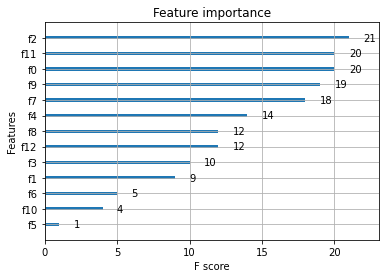

In [29]:
plot_importance(xgb)
plt.show()

## Result

In [30]:
result

,Model,Accuracy Score,Recall Score,F1 Score
0,Logestic Regression,0.836066,0.911765,0.861111
1,Naive bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.901639,0.941176,0.914286
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.852459,0.882353,0.869565
7,Stacking CV Classifier,0.934426,0.911765,0.939394


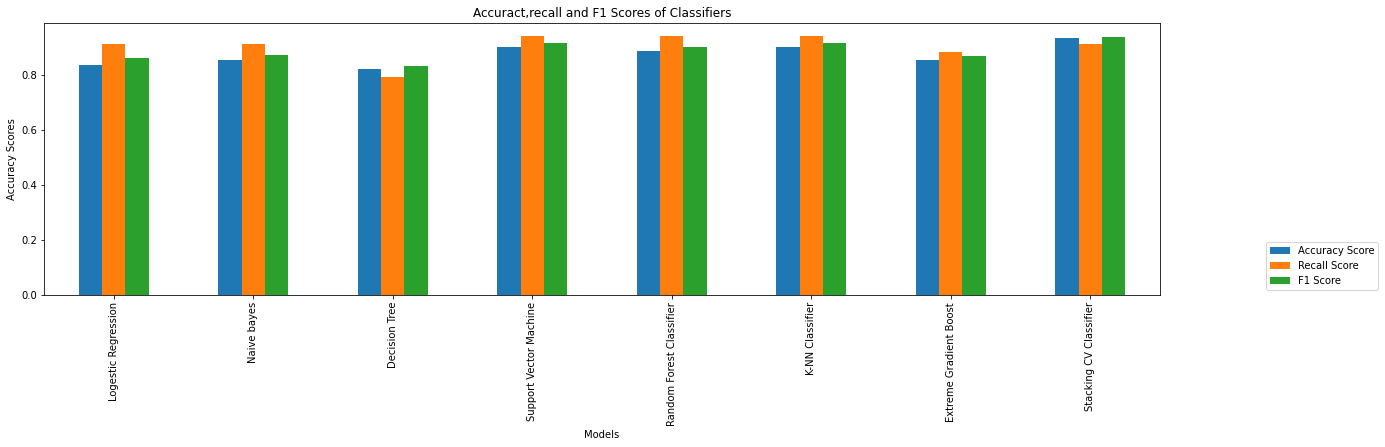

In [31]:
# Result Visualzation
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Accuract,recall and F1 Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

## Conclusion

The Best model in term of recall Score, KNN outperformed other models with **recall score of 94.1%** and in term of Accuracy score is stacking CV Classifier with **Accuracy percentage of 91.2%**.